In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# !pip3 install empyrical
import empyrical as ep
pd.set_option('display.float_format', lambda x: '%.20f' % x)

In [2]:
current_dir = os.getcwd()

In [3]:
path = os.path.join(current_dir, "Components")

In [4]:
# names of csv files
files = []
for i in os.listdir(path):
    if i.endswith('.csv'):
        files.append(i)

In [5]:
files

['N500 Rubber.csv',
 'N500 Machinery.csv',
 'N500 Pulp & Paper.csv',
 'N500 Pharmeceuticals.csv',
 'N500 Chemical.csv',
 'N500 Glass & Ceramics.csv',
 'N500 Electric Machinery.csv',
 'N500 Steel.csv',
 'N500 Precision Instrument.csv',
 'N500 Land Transport.csv',
 'N500 Insurance.csv',
 'N500 Communications.csv',
 'N500 Retail.csv',
 'N500 Wharehousing.csv',
 'N500 Marine Transport.csv',
 'N500 Securities.csv',
 'N500 Services.csv',
 'N500 Banking.csv',
 'N500 Real Estate.csv',
 'N500 Fishery.csv',
 'N500 Textiles & Apparel.csv',
 'N500 Automobile & Autoparts.csv',
 'N500 Other Manufacturing.csv',
 'N500 Mining.csv',
 'N500 Transportation Equipment.csv',
 'N500 Construction.csv',
 'N500 Shipbuilding.csv',
 'N500 Foods.csv',
 'N500 Petroleum.csv',
 'N500 Other Financial Services.csv',
 'N500 Railway & Bus.csv',
 'N500 Air Transport.csv',
 'N500 Trading Companies.csv',
 'N500 Nonferrous Metals.csv',
 'N500 Electric Power.csv',
 'N500 Gas.csv']

In [6]:
all = pd.read_csv("^N500.csv")

In [7]:
# list to store the dataframe
dfs = []
for i in files:
    file_path = os.path.join(path, i)
    ori_data = pd.read_csv(file_path)
    ori_data['FileName'] = i
    dfs.append(ori_data)

In [8]:
def at_least_6_years(component_data, year, end_year = 2024):
  final_dfs = []
  for i in component_data:
      i = i[i['Year'] <= end_year]
      if i['Year'].min() < year:
          final_dfs.append(i)
  return final_dfs

dfs_updated_year = at_least_6_years(dfs, 2018)

In [9]:
def rank_top_9_dfs(component_data):
    mean_returns = []        
    final_component = []
    if len(component_data) > 9:
        for i in component_data:
            avg_return = i['Return'].mean()
            mean_returns.append((avg_return, i))

        ranked_component = sorted(mean_returns, key = lambda x:x[0], reverse = True)
        for i in range(9):
            final_component.append(ranked_component[i][1])
    else:
        for i in component_data:
            final_component.append(i)
    return final_component

In [10]:
dfs_updated_year = rank_top_9_dfs(dfs_updated_year)

In [11]:
len(dfs_updated_year)

9

In [12]:
for i in dfs_updated_year:
    print(i['FileName'].iloc[0])
    print("")

N500 Marine Transport.csv

N500 Precision Instrument.csv

N500 Insurance.csv

N500 Mining.csv

N500 Shipbuilding.csv

N500 Petroleum.csv

N500 Communications.csv

N500 Other Manufacturing.csv

N500 Electric Machinery.csv



In [13]:
"""
function for confirming that dataset uses same dates
make the data1, data2, data3 param optional so that if other countries
dont have small cap, large cap, mid cap, or if they only have a combination
of the caps, the function will still work
"""
def check_dates(data, component_data, data1 = None, data2 = None, data3 = None):
    data = data.drop_duplicates(subset = ['Date'])

    #getting all the dates in one dataframe
    date = set(data['Date'].unique())

    dates = []
    #store the dates in the component dfs into one list
    for i in component_data:
      i_df = i.drop_duplicates(subset = ['Date'])
      date_component = set(i_df['Date'].unique())
      dates.append(date_component)

    if data1 is not None:
        data1 = data1.drop_duplicates(subset = ['Date'])
        date1 = set(data1['Date'].unique())
        dates.append(date1)

    if data2 is not None:
        data2 = data2.drop_duplicates(subset = ['Date'])
        date2 = set(data2['Date'].unique())
        dates.append(date2)

    if data3 is not None:
        data3 = data3.drop_duplicates(subset = ['Date'])
        date3 = set(data3['Date'].unique())
        dates.append(date3)

    #get the common dates between the first df and the component dfs
    #prevent overwritting
    common_dates = date
    for i in dates:
      common_dates = common_dates.intersection(i)

    common_dates_list = list(common_dates)

    #filtering
    data_df = data[data['Date'].isin(common_dates_list)].reset_index(drop = True)

    updated_component_data = []
    for i in component_data:
      df = i[i['Date'].isin(common_dates_list)].reset_index(drop = True)
      updated_component_data.append(df)

    updated_data1 = None
    updated_data2 = None
    updated_data3 = None

    if data1 is not None:
        updated_data1 = data1[data1['Date'].isin(common_dates_list)].reset_index(drop = True)

    if data2 is not None:
        updated_data2 = data2[data2['Date'].isin(common_dates_list)].reset_index(drop = True)

    if data3 is not None:
        updated_data3 = data3[data3['Date'].isin(common_dates_list)].reset_index(drop = True)

    return data_df, updated_component_data, updated_data1, updated_data2, updated_data3

In [14]:
# applying only similar dates
new_data = check_dates(all, dfs_updated_year)
all_df = new_data[0]
updated_component_df = new_data[1]

In [15]:
def buy_and_hold(returns, initial_balance=100):
    balance = initial_balance
    portfolio_values_bh = []

    for return_val in returns:
        balance *= (1 + return_val) 
        portfolio_values_bh.append(balance)

    return portfolio_values_bh

In [16]:
updated_component_df[0]

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,FileName
0,2017-01-05,2017,1,5,Thursday,1,2017-01,170.69999999999998863132,172.88999999999998635758,169.11000000000001364242,169.71000000000000795808,0,169.71000000000000795808,0.00000000000000000000,169.71000000000000795808,169.71000000000000795808,N500 Marine Transport.csv
1,2017-01-06,2017,1,6,Friday,1,2017-01,167.53000000000000113687,168.91999999999998749445,167.33000000000001250555,168.71999999999999886313,0,168.71999999999999886313,-0.00583351278061769972,169.21500000000000341061,169.21500000000000341061,N500 Marine Transport.csv
2,2017-01-10,2017,1,10,Tuesday,2,2017-02,167.91999999999998749445,169.31000000000000227374,166.72999999999998976818,167.53000000000000113687,0,167.53000000000000113687,-0.00705312015645139997,168.65333333333333598603,168.65333333333333598603,N500 Marine Transport.csv
3,2017-01-11,2017,1,11,Wednesday,2,2017-02,168.71999999999999886313,170.31000000000000227374,168.52000000000001023182,169.71000000000000795808,0,169.71000000000000795808,0.01301264221605009930,168.91750000000001818989,168.91750000000001818989,N500 Marine Transport.csv
4,2017-01-12,2017,1,12,Thursday,2,2017-02,169.31000000000000227374,169.71000000000000795808,166.34000000000000341061,167.91999999999998749445,0,167.91999999999998749445,-0.01054745432860569945,168.71800000000001773515,168.71800000000001773515,N500 Marine Transport.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1938,2024-12-23,2024,12,23,Monday,51,2024-51,991.97000000000002728484,991.97000000000002728484,975.62999999999999545253,983.27999999999997271516,0,983.27999999999997271516,-0.00502906218378449971,981.33428571428578379710,981.67600000000004456524,N500 Marine Transport.csv
1939,2024-12-24,2024,12,24,Tuesday,51,2024-51,991.90999999999996816769,1004.91999999999995907274,990.14999999999997726263,1004.91999999999995907274,0,1004.91999999999995907274,0.02200792548258660025,982.97357142857163125882,982.94899999999995543476,N500 Marine Transport.csv
1940,2024-12-26,2024,12,26,Thursday,51,2024-51,1015.30999999999994543032,1024.63000000000010913936,1015.30999999999994543032,1023.98000000000001818989,0,1023.98000000000001818989,0.01896668180823470051,987.19285714285717858729,984.52400000000000090949,N500 Marine Transport.csv
1941,2024-12-27,2024,12,27,Friday,51,2024-51,1019.92999999999994997779,1028.05999999999994543032,1017.54999999999995452526,1026.59999999999990905053,0,1026.59999999999990905053,0.00255863900384850022,991.97142857142841876339,986.23540000000002692104,N500 Marine Transport.csv


In [17]:
def grouping(dfs, freq):

    initial_balance_winner = 100
    initial_balance_loser = 100
    initial_balance_median = 100

    final_data = []
    n_category = int(len(dfs) / 3)

    all_dates = dfs[0].drop_duplicates(['Year', 'Month'])[['Year', 'Month']]
    all_dates = all_dates.sort_values(['Year', 'Month']).reset_index(drop=True)

    for i in dfs:
        i['Date'] = pd.to_datetime(i['Date'])
    
    for i in range(freq, len(all_dates)):
        current_period = all_dates.iloc[i - 1]
        next_period = all_dates.iloc[i]
    
        current_year, current_month = current_period['Year'], current_period['Month']
        next_year, next_month = next_period['Year'], next_period['Month']

        if i == len(all_dates) - 1:
            print(f"Final period processed: {current_period} -> {next_period}")

        winners_component = []
        losers_component = []
        median_component = []

        winner_returns = [[] for _ in range(len(dfs))]
        loser_returns = [[] for _ in range(len(dfs))]
        median_returns = [[] for _ in range(len(dfs))]


        winner_daily = [[] for _ in range(len(dfs))]
        loser_daily = [[] for _ in range(len(dfs))]
        median_daily = [[] for _ in range(len(dfs))]
            
        ranking_start_idx = max(0, i - freq)
        ranking_dates = all_dates.iloc[ranking_start_idx:i]
        ranking_periods_used = ranking_dates.to_dict('records')
        
        mean_returns = []
        for idx, j in enumerate(dfs):
            ranking_data = j[
                (j['Year'].isin(ranking_dates['Year'])) &
                (j['Month'].isin(ranking_dates['Month']))
            ]
            avg_returns = ranking_data['Return'].mean()
            returns = ranking_data['Return'].tolist()
            mean_returns.append((avg_returns, idx, j, returns))

        ranked_component = sorted(mean_returns, key = lambda x:x[0], reverse = True)

        total_sorted = len(ranked_component)

        # append original index and component
        for j in range(n_category):
            winners_component.append((ranked_component[j][1], ranked_component[j][2]))

        for j in range(total_sorted - n_category, total_sorted):
            losers_component.append((ranked_component[j][1], ranked_component[j][2]))

        for j in range(n_category, total_sorted - n_category):
            median_component.append((ranked_component[j][1], ranked_component[j][2]))
        
        winner_buy_and_hold_val = []
        loser_buy_and_hold_val = []
        median_buy_and_hold_val = []
 
        for idx, component in winners_component:
            next_time_df = component[(component['Year'] == next_year) & (component['Month'] == next_month)]
            if not next_time_df.empty:
                return_val = next_time_df['Return'].tolist()
                buy_and_hold_val = buy_and_hold(return_val, initial_balance = initial_balance_winner/len(winners_component))
                winner_buy_and_hold_val.append(buy_and_hold_val[-1])
                winner_returns[idx].extend(return_val)
                winner_daily[idx].extend(buy_and_hold_val)
            else:
                print("No more data for next time")

        for idx, component in losers_component:
            next_time_df = component[(component['Year'] == next_year) & (component['Month'] == next_month)]
            if not next_time_df.empty:
                return_val = next_time_df['Return'].tolist()
                buy_and_hold_val = buy_and_hold(return_val, initial_balance = initial_balance_loser/len(losers_component))
                loser_buy_and_hold_val.append(buy_and_hold_val[-1])
                loser_returns[idx].extend(return_val)
                loser_daily[idx].extend(buy_and_hold_val)
            else:
                print("No more data for next time")

        for idx, component in median_component:
            next_time_df = component[(component['Year'] == next_year) & (component['Month'] == next_month)]
            if not next_time_df.empty:
                return_val = next_time_df['Return'].tolist()
                buy_and_hold_val = buy_and_hold(return_val, initial_balance = initial_balance_median/len(median_component))
                median_buy_and_hold_val.append(buy_and_hold_val[-1])
                median_returns[idx].extend(return_val)
                median_daily[idx].extend(buy_and_hold_val)
            else:
                print("No more data for next time")

        initial_balance_winner = sum(winner_buy_and_hold_val)
        initial_balance_loser = sum(loser_buy_and_hold_val)
        initial_balance_median = sum(median_buy_and_hold_val)
                
        winner_daily_sum = np.sum([row for row in winner_daily if len(row) > 0], axis = 0)
        loser_daily_sum = np.sum([row for row in loser_daily if len(row) > 0], axis = 0)
        median_daily_sum = np.sum([row for row in median_daily if len(row) > 0], axis = 0)

        winner_returns_filtered = [r for r in winner_returns if r]
        loser_returns_filtered = [r for r in loser_returns if r]
        median_returns_filtered = [r for r in median_returns if r]

        results = {
            'Year': next_year,
            'Month' : next_month,
            'Winners_Buy_and_Hold' : sum(winner_buy_and_hold_val),
            'Losers_Buy_and_Hold' : sum(loser_buy_and_hold_val),
            'Median_Buy_and_Hold' : sum(median_buy_and_hold_val),
            'Ranking_Periods': ranking_periods_used,
            'Winner_Return' : winner_returns_filtered,
            'Loser_Return' : loser_returns_filtered,
            'Median_Return' : median_returns_filtered,
            'Winners_Daily_Buy_and_Hold': winner_daily_sum,
            'Losers_Daily_Buy_and_Hold': loser_daily_sum,
            'Median_Daily_Buy_and_Hold': median_daily_sum,
        }

        final_data.append(results)

    final_df = pd.DataFrame(final_data)

    return final_df

In [18]:
component_df_new = grouping(updated_component_df, 6)

Final period processed: Year     2024
Month      11
Name: 94, dtype: int64 -> Year     2024
Month      12
Name: 95, dtype: int64


In [19]:
component_df_new

,Year,Month,Winners_Buy_and_Hold,Losers_Buy_and_Hold,Median_Buy_and_Hold,Ranking_Periods,Winner_Return,Loser_Return,Median_Return,Winners_Daily_Buy_and_Hold,Losers_Daily_Buy_and_Hold,Median_Daily_Buy_and_Hold
0,2017,7,102.07312153935647813796,100.44933245931423471120,99.94896128590838202399,"[{'Year': 2017, 'Month': 1}, {'Year': 2017, 'M...","[[-0.0007741926228467, -0.0155081690791746, 0....","[[0.006165185464412, 0.0110787473230775, 0.001...","[[-0.0013168164963185, 0.0103975850186028, 0.0...","[99.91103904849066, 98.8066264424258, 99.55882...","[100.29330528932422, 100.88044237470461, 101.6...","[100.75849611064038, 100.3831383650226, 100.59..."
1,2017,8,101.87398791312182311231,102.86692745297202122856,97.49932092882035306047,"[{'Year': 2017, 'Month': 2}, {'Year': 2017, 'M...","[[0.0065058414477339, 0.0073568563145702, -0.0...","[[0.0048009314584109, 0.0012096102133296, 0.0,...","[[0.0164994849875823, -6.266221934136951e-05, ...","[102.33718700051595, 103.31176720922744, 102.7...","[99.11679224419954, 99.19356356084597, 99.0615...","[100.24933308240674, 100.63420040964522, 100.8..."
2,2017,9,108.28916583762271841351,110.29356811421511963545,102.74816432086849715688,"[{'Year': 2017, 'Month': 3}, {'Year': 2017, 'M...","[[-0.0004702951171595, -0.0167936600866721, 0....","[[0.0008769130497101, -0.0074905954740702, -0....","[[0.0045799365816827, -0.0208893633290125, 0.0...","[102.29375399378397, 101.26877615581054, 101.7...","[103.73408637617314, 102.64678223682793, 102.2...","[97.91308804338351, 97.00224824270877, 97.0192..."
3,2017,10,115.84380016807472202345,114.17068759022259882840,106.05480483579364658908,"[{'Year': 2017, 'Month': 4}, {'Year': 2017, 'M...","[[0.0036122495862609, 0.00728543946932, 0.0055...","[[-0.0105860003629556, 0.0069574514038683, -0....","[[0.002412309179145, -0.0074562072806722, -0.0...","[108.51469220394586, 109.50012867323842, 109.3...","[109.57442099269127, 110.07372822775656, 109.8...","[103.1853844081374, 103.29288988547668, 103.32..."
4,2017,11,115.71171014748259153748,114.09749675839788096710,111.67020608364416034419,"[{'Year': 2017, 'Month': 5}, {'Year': 2017, 'M...","[[0.02423594889459, 0.003725034399618, -0.0022...","[[0.0025233839176892, 0.011183020312613, 0.032...","[[0.0231181507445981, 0.012441827345264, 0.037...","[118.60798913461366, 118.4481212425926, 119.68...","[114.63931240890338, 115.31210062993077, 117.6...","[108.30299902289993, 108.62905812846782, 111.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024,8,594.47927211498472388485,150.14716740286687013395,213.85505671087830137367,"[{'Year': 2024, 'Month': 2}, {'Year': 2024, 'M...","[[-0.0511817779099875, -0.0902629221189896, -0...","[[-0.0081000587200499, -0.0507680318122492, -0...","[[-0.0293888902554608, -0.0679220158341197, -0...","[591.882154316084, 545.8743655489535, 466.5785...","[150.1667549352359, 140.95853579777867, 120.57...","[209.66409910715092, 195.99293510244286, 170.8..."
86,2024,9,617.57349637912420803332,145.48248727450692285856,206.11774001507836828750,"[{'Year': 2024, 'Month': 3}, {'Year': 2024, 'M...","[[0.0105651341656607, 0.0218128039203899, -0.0...","[[-0.0145168650255129, -0.0184862196803921, -0...","[[-0.0077688760730825, -0.020309185637415, -0....","[600.2888097722415, 602.8313010444449, 581.520...","[149.9676839225661, 149.42779298908692, 141.86...","[213.89691008756674, 212.52979831885844, 202.5..."
87,2024,10,617.31626518983841833688,153.36374030497762532832,212.21270232166486380265,"[{'Year': 2024, 'Month': 4}, {'Year': 2024, 'M...","[[0.0116437407307525, -0.0020567348364313, 0.0...","[[0.031201356294912, -0.0281936772750733, 0.04...","[[0.020720553209528, -0.0198346842683174, 0.03...","[639.5822822542541, 631.7884443406142, 637.062...","[148.78089140317593, 148.0729465584007, 151.54...","[209.47901212780314, 208.53730075878093, 212.3..."
88,2024,11,604.90979107479040521866,143.66568184231641680526,207.77821874559296588814,"[{'Year': 2024, 'Month': 5}, {'Year': 2024, 'M...","[[-0.0374731

In [20]:
component_df_new = component_df_new.drop('Ranking_Periods', axis=1)

In [21]:
component_df_new

,Year,Month,Winners_Buy_and_Hold,Losers_Buy_and_Hold,Median_Buy_and_Hold,Winner_Return,Loser_Return,Median_Return,Winners_Daily_Buy_and_Hold,Losers_Daily_Buy_and_Hold,Median_Daily_Buy_and_Hold
0,2017,7,102.07312153935647813796,100.44933245931423471120,99.94896128590838202399,"[[-0.0007741926228467, -0.0155081690791746, 0....","[[0.006165185464412, 0.0110787473230775, 0.001...","[[-0.0013168164963185, 0.0103975850186028, 0.0...","[99.91103904849066, 98.8066264424258, 99.55882...","[100.29330528932422, 100.88044237470461, 101.6...","[100.75849611064038, 100.3831383650226, 100.59..."
1,2017,8,101.87398791312182311231,102.86692745297202122856,97.49932092882035306047,"[[0.0065058414477339, 0.0073568563145702, -0.0...","[[0.0048009314584109, 0.0012096102133296, 0.0,...","[[0.0164994849875823, -6.266221934136951e-05, ...","[102.33718700051595, 103.31176720922744, 102.7...","[99.11679224419954, 99.19356356084597, 99.0615...","[100.24933308240674, 100.63420040964522, 100.8..."
2,2017,9,108.28916583762271841351,110.29356811421511963545,102.74816432086849715688,"[[-0.0004702951171595, -0.0167936600866721, 0....","[[0.0008769130497101, -0.0074905954740702, -0....","[[0.0045799365816827, -0.0208893633290125, 0.0...","[102.29375399378397, 101.26877615581054, 101.7...","[103.73408637617314, 102.64678223682793, 102.2...","[97.91308804338351, 97.00224824270877, 97.0192..."
3,2017,10,115.84380016807472202345,114.17068759022259882840,106.05480483579364658908,"[[0.0036122495862609, 0.00728543946932, 0.0055...","[[-0.0105860003629556, 0.0069574514038683, -0....","[[0.002412309179145, -0.0074562072806722, -0.0...","[108.51469220394586, 109.50012867323842, 109.3...","[109.57442099269127, 110.07372822775656, 109.8...","[103.1853844081374, 103.29288988547668, 103.32..."
4,2017,11,115.71171014748259153748,114.09749675839788096710,111.67020608364416034419,"[[0.02423594889459, 0.003725034399618, -0.0022...","[[0.0025233839176892, 0.011183020312613, 0.032...","[[0.0231181507445981, 0.012441827345264, 0.037...","[118.60798913461366, 118.4481212425926, 119.68...","[114.63931240890338, 115.31210062993077, 117.6...","[108.30299902289993, 108.62905812846782, 111.3..."
...,...,...,...,...,...,...,...,...,...,...,...
85,2024,8,594.47927211498472388485,150.14716740286687013395,213.85505671087830137367,"[[-0.0511817779099875, -0.0902629221189896, -0...","[[-0.0081000587200499, -0.0507680318122492, -0...","[[-0.0293888902554608, -0.0679220158341197, -0...","[591.882154316084, 545.8743655489535, 466.5785...","[150.1667549352359, 140.95853579777867, 120.57...","[209.66409910715092, 195.99293510244286, 170.8..."
86,2024,9,617.57349637912420803332,145.48248727450692285856,206.11774001507836828750,"[[0.0105651341656607, 0.0218128039203899, -0.0...","[[-0.0145168650255129, -0.0184862196803921, -0...","[[-0.0077688760730825, -0.020309185637415, -0....","[600.2888097722415, 602.8313010444449, 581.520...","[149.9676839225661, 149.42779298908692, 141.86...","[213.89691008756674, 212.52979831885844, 202.5..."
87,2024,10,617.31626518983841833688,153.36374030497762532832,212.21270232166486380265,"[[0.0116437407307525, -0.0020567348364313, 0.0...","[[0.031201356294912, -0.0281936772750733, 0.04...","[[0.020720553209528, -0.0198346842683174, 0.03...","[639.5822822542541, 631.7884443406142, 637.062...","[148.78089140317593, 148.0729465584007, 151.54...","[209.47901212780314, 208.53730075878093, 212.3..."
88,2024,11,604.90979107479040521866,143.66568184231641680526,207.77821874559296588814,"[[-0.0374731618840302, 0.0225249588968863, 0.0...","[[-0.0197728731708197, 0.0019146525336506, 0.0...","[[-0.0080968890551853, 0.0060792525411199, -0....","[600.1445026697911, 604.3975643822223, 629.757...","[150.51290031880222, 151.06898725276704, 152.2...","[208.25351250688175, 211.65820959691362, 215.2..."


In [22]:
def computing_returns_and_filtering_year(df):
    df['Winner_Return_Calc'] = 0
    df['Loser_Return_Calc'] = 0
    df['Median_Return_Calc'] = 0
    
    for i in range(1, len(df)):
        df.loc[i, 'Winner_Return_Calc'] = (df.loc[i, 'Winners_Buy_and_Hold'] - df.loc[i - 1, 'Winners_Buy_and_Hold']) / df.loc[i - 1, 'Winners_Buy_and_Hold']
        df.loc[i, 'Loser_Return_Calc'] = (df.loc[i, 'Losers_Buy_and_Hold'] - df.loc[i - 1, 'Losers_Buy_and_Hold']) / df.loc[i - 1, 'Losers_Buy_and_Hold']
        df.loc[i, 'Median_Return_Calc'] = (df.loc[i, 'Median_Buy_and_Hold'] - df.loc[i - 1, 'Median_Buy_and_Hold']) / df.loc[i - 1, 'Median_Buy_and_Hold']
    
    df = df[df['Year'] >= 2018].reset_index(drop=True)

    return df

In [23]:
component_df_new_returns_added = computing_returns_and_filtering_year(component_df_new)

/var/folders/z_/w3xlnh2d73q7rhjpcns83fn40000gn/T/ipykernel_27730/935731650.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0019508919021142582' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Winner_Return_Calc'] = (df.loc[i, 'Winners_Buy_and_Hold'] - df.loc[i - 1, 'Winners_Buy_and_Hold']) / df.loc[i - 1, 'Winners_Buy_and_Hold']
/var/folders/z_/w3xlnh2d73q7rhjpcns83fn40000gn/T/ipykernel_27730/935731650.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.02406780547433706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Loser_Return_Calc'] = (df.loc[i, 'Losers_Buy_and_Hold'] - df.loc[i - 1, 'Losers_Buy_and_Hold']) / df.loc[i - 1, 'Losers_Buy_and_Hold']
/var/folders/z_/w3xlnh2d73q7rhjpcns83fn40000gn/T/ipykernel_27

In [24]:
component_df_new_returns_added

,Year,Month,Winners_Buy_and_Hold,Losers_Buy_and_Hold,Median_Buy_and_Hold,Winner_Return,Loser_Return,Median_Return,Winners_Daily_Buy_and_Hold,Losers_Daily_Buy_and_Hold,Median_Daily_Buy_and_Hold,Winner_Return_Calc,Loser_Return_Calc,Median_Return_Calc
0,2018,1,120.45366201351566814992,116.81149309143509640307,121.19026160236902001088,"[[0.0236957536193014, 0.0029591433324704, 0.00...","[[0.0227634132415923, 0.0085220783077486, 0.00...","[[0.0366371611487199, 0.0179302038305988, -0.0...","[124.30376225207439, 124.49813885235612, 124.5...","[120.05579617433209, 121.08977204751417, 121.1...","[120.21734839449519, 122.09954129123653, 123.4...",0.00050252165246722036,-0.00350728162140346699,0.04173213957034301036
1,2018,2,114.91048701832730216665,110.35720592702890030523,113.37799954848777872485,"[[0.0185288026451966, -0.0011944043062508, -0....","[[-0.0184422183040474, 0.0053297738528348, -0....","[[0.0124887616373954, -0.0068733431182868, -0....","[123.61961047332233, 122.6353972197431, 119.43...","[117.37292119558442, 117.0309382329547, 114.73...","[123.69861753336168, 122.61880017889543, 118.6...",-0.04601914879571188804,-0.05525387094704845015,-0.06446278727835114131
2,2018,3,109.70018399717385193526,102.16493602651152627914,110.27049398824954096199,"[[-0.0162397243184492, -0.0278522653157387, -0...","[[-0.0151855671861247, -0.0165299935475078, -0...","[[-0.0169546169077227, -0.0094596376637926, -0...","[112.6670295833171, 110.38463096697564, 109.69...","[108.47484329680738, 106.05368875226785, 104.1...","[111.80045929324186, 110.10100909004879, 108.8...",-0.04534227603023254644,-0.07423411848551439429,-0.02740836469697339323
3,2018,4,114.58486394182119738616,111.20390195746499273355,120.81884016198475251258,"[[0.0072853193656337, -0.0067939603868162, -0....","[[0.019322305032247, -0.0128348386904979, -0.0...","[[0.0078437250896481, -0.0068003618435388, -0....","[110.40403034500414, 109.80498714686934, 109.0...","[103.5577951908038, 102.55052980929543, 102.99...","[111.0211520372608, 109.31187418696229, 109.59...",0.04452754559439195403,0.08847424843106523051,0.09565882759951403747
4,2018,5,117.02734745009647099323,100.70438833560166358438,112.52292403456065983391,"[[-0.0014647699084003, 0.0062556810057299, -0....","[[0.0141650017656245, 0.0025728874957855, -0.0...","[[0.0025950976819764, -0.0003585339773108, -0....","[114.79596314261251, 115.14285154989375, 115.7...","[110.708237970874, 110.34816743538269, 109.424...","[122.55233727530569, 119.92658571477554, 120.4...",0.02131593496952101027,-0.09441677348587415586,-0.06866409341706605773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2024,8,594.47927211498472388485,150.14716740286687013395,213.85505671087830137367,"[[-0.0511817779099875, -0.0902629221189896, -0...","[[-0.0081000587200499, -0.0507680318122492, -0...","[[-0.0293888902554608, -0.0679220158341197, -0...","[591.882154316084, 545.8743655489535, 466.5785...","[150.1667549352359, 140.95853579777867, 120.57...","[209.66409910715092, 195.99293510244286, 170.8...",-0.04574941066827369757,-0.01740782308870860579,-0.01754995177681314619
80,2024,9,617.57349637912420803332,145.48248727450692285856,206.11774001507836828750,"[[0.0105651341656607, 0.0218128039203899, -0.0...","[[-0.0145168650255129, -0.0184862196803921, -0...","[[-0.0077688760730825, -0.020309185637415, -0....","[600.2888097722415, 602.8313010444449, 581.520...","[149.9676839225661, 149.42779298908692, 141.86...","[213.89691008756674, 212.52979831885844, 202.5...",0.03884782085332754570,-0.03106738681152689668,-0.03618019052156625642
81,2024,10,617.31626518983841833688,153.36374030497762532832,212.21270232166486380265,"[[0.0116437407307525, -0.0020567348364313, 0.0...","[[0.031201356294912, -0.0281936772750733, 0.04...","[[0.020720553209528, -0.0198346842683174, 0.03...","[639.5822822542541, 631.7884443406142, 637.062...","[148.78089140317593, 148.0729465584007, 151.54...","[209.47901212780314, 208.53730075878093, 212.3...",-0.0004165191524473667

In [25]:
def computing_metrics(df):
    yearly_data = df.groupby('Year')

    results = []

    for year, group in yearly_data:
        # for mdd
        winner_returns = group['Winner_Return_Calc']
        loser_returns = group['Loser_Return_Calc']
        median_returns = group['Median_Return_Calc']

        # for volatility
        winner_returns_vol = group['Winner_Return'] 
        loser_returns_vol = group['Loser_Return']
        median_returns_vol = group['Median_Return']

        winner_daily_vals = [val for row in group['Winners_Daily_Buy_and_Hold'] for val in row]
        loser_daily_vals = [val for row in group['Losers_Daily_Buy_and_Hold'] for val in row]
        median_daily_vals = [val for row in group['Median_Daily_Buy_and_Hold'] for val in row]

        winner_daily = pd.Series(winner_daily_vals)
        loser_daily = pd.Series(loser_daily_vals)
        median_daily = pd.Series(median_daily_vals)
    
        def sd_cal(returns):
            variances = []
            num = []
            for sector_returns in returns:
                for sector in sector_returns:
                    if len(sector) > 1:
                        variance = np.var(sector)
                        variances.append(variance)
                        num.append(len(sector))
                    else:
                        variances.append(0)
                        num.append(1)
                        
            combined_variance = sum(v / n for v, n, in zip(variances, num))
            combined_sd = np.sqrt(combined_variance)
            
            return combined_sd
    
        def annualized_returns(val):
            start = val.iloc[0]
            end = val.iloc[-1]
            if start == 0:
                return 0
            else:
                ann_returns = (end - start) / start
                return ann_returns
            
        # volatility
        winner_sd = sd_cal(winner_returns_vol)
        winner_volatility = winner_sd * np.sqrt(250)
        loser_sd = sd_cal(loser_returns_vol)
        loser_volatility = loser_sd * np.sqrt(250)
        median_sd = sd_cal(median_returns_vol)
        median_volatility = median_sd * np.sqrt(250)
    
        # ar
        winner_ar = annualized_returns(winner_daily)
        loser_ar = annualized_returns(loser_daily)
        median_ar = annualized_returns(median_daily)
    
        # sharpe
        if winner_volatility == 0:
            winner_sharpe = 0
        else:
            winner_sharpe = (winner_ar / winner_volatility)

        if loser_volatility == 0:
            loser_sharpe = 0
        else:
            loser_sharpe = (loser_ar / loser_volatility)
            
        if median_volatility == 0:
            median_sharpe = 0
        else:
            median_sharpe = (median_ar / median_volatility)


        # drawdowns
        winner_drawdown = ep.max_drawdown(winner_returns)
        loser_drawdown = ep.max_drawdown(loser_returns)
        median_drawdown = ep.max_drawdown(median_returns)
        
        results.append({
            "Year" : year,
            "Winner_Volatility": winner_volatility ,
            "Loser_Volatility": loser_volatility ,
            "Median_Volatility": median_volatility ,
            "Winner_Annualized_Returns" : winner_ar ,
            "Loser_Annualized_Returns" : loser_ar ,
            "Median_Annualized_Returns" : median_ar ,
            "Winner_Sharpe_Ratio" : winner_sharpe ,
            "Loser_Sharpe_Ratio" : loser_sharpe,
            "Median_Sharpe_Ratio" : median_sharpe,
            "Winner_Max_Drawdowns" : winner_drawdown,
            "Loser_Max_Drawdowns" : loser_drawdown,
            "Median_Max_Drawdowns" : median_drawdown
        })

    results_df = pd.DataFrame(results)
    return results_df
        

In [26]:
metrics_wml = computing_metrics(component_df_new_returns_added)

In [27]:
metrics_wml

,Year,Winner_Volatility,Loser_Volatility,Median_Volatility,Winner_Annualized_Returns,Loser_Annualized_Returns,Median_Annualized_Returns,Winner_Sharpe_Ratio,Loser_Sharpe_Ratio,Median_Sharpe_Ratio,Winner_Max_Drawdowns,Loser_Max_Drawdowns,Median_Max_Drawdowns
0,2018,0.36618494505987875254,0.34364028078468222827,0.37090017198691865863,-0.19034590600931891591,-0.32520524091100777575,-0.16863368685363616661,-0.51980811493545553414,-0.94635367008902704367,-0.45466057874889242996,-0.26009222040659629727,-0.30889603037476293101,-0.21360185623742405925
1,2019,0.27058213954529958256,0.37393039680402800906,0.30555649637105203320,0.34524222471858828643,0.05256020803941964525,0.18991443697305643301,1.27592392202512483479,0.14056147477886307695,0.62153624363605131098,-0.07071889488474322749,-0.20321323636736782214,-0.12335356507478703603
2,2020,0.39118132787211262746,0.47475751354376288793,0.45953663316153547935,0.29359684061337965044,-0.28562337613048149887,0.04336583085534152088,0.75053899481972230490,-0.60161949623184407532,0.09436860464636263879,-0.26237546631478136927,-0.41134764504407272945,-0.26674499084800262771
3,2021,0.50993410260401617062,0.33128594109100051313,0.31764776587438459110,0.72061593709710403122,0.28033113675458964931,0.02749919082229529063,1.41315502026090333842,0.84619086409581700803,0.08657133396357645505,-0.04277040268592329636,-0.10624314709564157411,-0.09132564268241737115
4,2022,0.52703026242718997718,0.34977502766853979521,0.38693749299828139598,0.22287797923718438708,0.02670996376868126423,0.03395300681148834959,0.42289408242088433187,0.07636326683102330481,0.08774804051268082772,-0.15096372842222882671,-0.08466713853235419140,-0.13814602124016606144
5,2023,0.37975062457518526937,0.26090140614922741058,0.33977891652243230602,0.21045637351766208201,0.52667874700170913549,0.29335825036139029365,0.55419625379969505996,2.01868880193181254867,0.86337979225977867781,-0.08824108853631904004,-0.03790493669797854320,-0.10059319658040233314
6,2024,0.56447602539101471297,0.43731372620188113665,0.41966404090936565430,0.42441005897049155493,0.26790122734434151930,0.44639833184287935897,0.75186551754169028694,0.61260649115931897768,1.06370403067077989867,-0.10424109871054738907,-0.07094702347519299401,-0.08059840646184507351


In [28]:
def other_df_get_buy_and_hold(all_df, freq):
    all_df['Date'] = pd.to_datetime(all_df['Date'])
    all_df['Buy_and_Hold'] = buy_and_hold(all_df['Return'], initial_balance=100)
    
    grouped_all_df = []

    all_dates = all_df.drop_duplicates(['Year', 'Month'])[['Year', 'Month']]
    all_dates = all_dates.sort_values(by=['Year', 'Month'], ascending=[True, True]).reset_index(drop=True)
    
    for i in range(freq, len(all_dates)):
        current_year, current_month = all_dates.iloc[i]
        buy_and_hold_daily = []

        current_df = all_df[(all_df['Year'] == current_year) & (all_df['Month'] == current_month)]
        buy_and_hold_val = current_df['Buy_and_Hold'].iloc[-1]
        return_vals = current_df['Return'].tolist()
        buy_and_hold_daily.extend(current_df['Buy_and_Hold'])
        
        grouped_all_df.append({
            'Year': current_year,
            'Month': current_month,
            'Buy_and_Hold': buy_and_hold_val,
            'Return' : return_vals,
            'Daily_Buy_and_Hold' : buy_and_hold_daily
        })

    final_df = pd.DataFrame(grouped_all_df)
    final_df = final_df[final_df['Year'] >= 2018].reset_index(drop=True)

    return final_df


In [29]:
new_all_df = other_df_get_buy_and_hold(all_df, 6)

In [30]:
new_all_df

,Year,Month,Buy_and_Hold,Return,Daily_Buy_and_Hold
0,2018,1,126.97467912489685204491,"[0.0257031498406439, 0.0069225541611044, 0.004...","[127.37451420991407, 128.25627118327657, 128.8..."
1,2018,2,123.10854033628062609296,"[0.0156514738246824, -0.0041469029704762, -0.0...","[128.96201999161764, 128.4272270078358, 125.32..."
2,2018,3,120.72924493732915607325,"[-0.014895858355855, -0.0161877393768525, -0.0...","[121.27473295703533, 119.31156918692946, 118.6..."
3,2018,4,123.40222619148866556316,"[-0.0048631258564253, -0.0017078230145608, -0....","[120.14212342464772, 119.9369419412449, 119.76..."
4,2018,5,123.03757406003543906081,"[0.0004292167902195, 0.0005645456510137, 0.000...","[123.45519249892052, 123.52488859094085, 123.5..."
...,...,...,...,...,...
79,2024,8,183.75458981534453073436,"[-0.0280413500257135, -0.0515086504181381, -0....","[180.34102622485906, 171.05190334899453, 152.2..."
80,2024,9,180.91814220976900173810,"[-0.001899469928508, 0.0047667175489014, -0.03...","[183.40555349776497, 184.27979596818875, 178.6..."
81,2024,10,183.18796366143422460482,"[0.0135443228911726, -0.0187543915738253, 0.01...","[183.36855594472922, 179.9295902442149, 182.79..."
82,2024,11,179.47175900847000207250,"[-0.0200269914711014, 0.0109210940291264, 0.01...","[179.51925987557826, 181.47980659271863, 184.4..."


In [31]:
def computing_metrics2(df):
    yearly_data = df.groupby('Year')

    results = []

    for year, group in yearly_data:
        returns_vals = [val for row in group['Return'] for val in row] 
        daily_buy_and_hold = [val for row in group['Daily_Buy_and_Hold'] for val in row]
        
        returns = pd.Series(returns_vals)
        daily = pd.Series(daily_buy_and_hold)
    
    
        def annualized_returns(val):
            start = val.iloc[0]
            end = val.iloc[-1]
            if start == 0:
                return 0
            else:
                ann_returns = (end - start) / start
                return ann_returns
            
        # volatility and drawdown
        if len(returns) > 1:
            sd = np.std(returns)
            volatility = sd * np.sqrt(250)
            drawdown = ep.max_drawdown(returns)
        else:
            sd = 0
            volatility = 0
            drawdown = 0
            
        # ar
        ar = annualized_returns(daily)
    
        # sharpe
        sharpe = (ar / volatility)
        
        results.append({
            "Year" : year,
            "Volatility": volatility,
            "Annualized_Returns" : ar,
            "Sharpe_Ratio" : sharpe,
            "Max_Drawdowns" : drawdown
        })

    results_df = pd.DataFrame(results)
    return results_df
        

In [32]:
metrics_all = computing_metrics2(new_all_df)

In [33]:
metrics_all

,Year,Volatility,Annualized_Returns,Sharpe_Ratio,Max_Drawdowns
0,2018,0.18725323949211922225,-0.18642588465786044671,-0.99558162605622857466,-0.24864684714122411990
1,2019,0.13439664380095367457,0.23663811376001772646,1.76074422000066754812,-0.09435669797133762471
2,2020,0.21425387770208453864,0.20932358328114417101,0.97698854053976169620,-0.27845930941738106235
3,2021,0.16579248322957734763,0.05086893272082134571,0.30682291337890005289,-0.10668150049553097591
4,2022,0.20008679582421146081,-0.14104791069502992107,-0.70493362699930073312,-0.19028638547456463992
5,2023,0.14229545289154951759,0.25610854557596196557,1.79983646962461341090,-0.09498179102649374761
6,2024,0.22427011500352106443,0.10346190496686502591,0.46132720342717381534,-0.22668057182034440089


In [34]:
def merge_dfs(dfs):
    merged_df = pd.DataFrame()
                
    for i in range(len(dfs)):
        if merged_df.empty:
            merged_df = dfs[i]
        else:
            merged_df = pd.merge(merged_df, dfs[i], on = ['Year', 'Month'])
    
    return merged_df

In [35]:
def merge_dfs_metrics(dfs):
    merged_df = pd.DataFrame()

    for i in range(len(dfs)):
        if merged_df.empty:
            merged_df = dfs[i]
        else:
            merged_df = pd.merge(merged_df, dfs[i], on = "Year")
    return merged_df

In [36]:
merged_df_vals = merge_dfs((new_all_df, component_df_new_returns_added))

In [37]:
merged_df_vals

,Year,Month,Buy_and_Hold,Return,Daily_Buy_and_Hold,Winners_Buy_and_Hold,Losers_Buy_and_Hold,Median_Buy_and_Hold,Winner_Return,Loser_Return,Median_Return,Winners_Daily_Buy_and_Hold,Losers_Daily_Buy_and_Hold,Median_Daily_Buy_and_Hold,Winner_Return_Calc,Loser_Return_Calc,Median_Return_Calc
0,2018,1,126.97467912489685204491,"[0.0257031498406439, 0.0069225541611044, 0.004...","[127.37451420991407, 128.25627118327657, 128.8...",120.45366201351566814992,116.81149309143509640307,121.19026160236902001088,"[[0.0236957536193014, 0.0029591433324704, 0.00...","[[0.0227634132415923, 0.0085220783077486, 0.00...","[[0.0366371611487199, 0.0179302038305988, -0.0...","[124.30376225207439, 124.49813885235612, 124.5...","[120.05579617433209, 121.08977204751417, 121.1...","[120.21734839449519, 122.09954129123653, 123.4...",0.00050252165246722036,-0.00350728162140346699,0.04173213957034301036
1,2018,2,123.10854033628062609296,"[0.0156514738246824, -0.0041469029704762, -0.0...","[128.96201999161764, 128.4272270078358, 125.32...",114.91048701832730216665,110.35720592702890030523,113.37799954848777872485,"[[0.0185288026451966, -0.0011944043062508, -0....","[[-0.0184422183040474, 0.0053297738528348, -0....","[[0.0124887616373954, -0.0068733431182868, -0....","[123.61961047332233, 122.6353972197431, 119.43...","[117.37292119558442, 117.0309382329547, 114.73...","[123.69861753336168, 122.61880017889543, 118.6...",-0.04601914879571188804,-0.05525387094704845015,-0.06446278727835114131
2,2018,3,120.72924493732915607325,"[-0.014895858355855, -0.0161877393768525, -0.0...","[121.27473295703533, 119.31156918692946, 118.6...",109.70018399717385193526,102.16493602651152627914,110.27049398824954096199,"[[-0.0162397243184492, -0.0278522653157387, -0...","[[-0.0151855671861247, -0.0165299935475078, -0...","[[-0.0169546169077227, -0.0094596376637926, -0...","[112.6670295833171, 110.38463096697564, 109.69...","[108.47484329680738, 106.05368875226785, 104.1...","[111.80045929324186, 110.10100909004879, 108.8...",-0.04534227603023254644,-0.07423411848551439429,-0.02740836469697339323
3,2018,4,123.40222619148866556316,"[-0.0048631258564253, -0.0017078230145608, -0....","[120.14212342464772, 119.9369419412449, 119.76...",114.58486394182119738616,111.20390195746499273355,120.81884016198475251258,"[[0.0072853193656337, -0.0067939603868162, -0....","[[0.019322305032247, -0.0128348386904979, -0.0...","[[0.0078437250896481, -0.0068003618435388, -0....","[110.40403034500414, 109.80498714686934, 109.0...","[103.5577951908038, 102.55052980929543, 102.99...","[111.0211520372608, 109.31187418696229, 109.59...",0.04452754559439195403,0.08847424843106523051,0.09565882759951403747
4,2018,5,123.03757406003543906081,"[0.0004292167902195, 0.0005645456510137, 0.000...","[123.45519249892052, 123.52488859094085, 123.5...",117.02734745009647099323,100.70438833560166358438,112.52292403456065983391,"[[-0.0014647699084003, 0.0062556810057299, -0....","[[0.0141650017656245, 0.0025728874957855, -0.0...","[[0.0025950976819764, -0.0003585339773108, -0....","[114.79596314261251, 115.14285154989375, 115.7...","[110.708237970874, 110.34816743538269, 109.424...","[122.55233727530569, 119.92658571477554, 120.4...",0.02131593496952101027,-0.09441677348587415586,-0.06866409341706605773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2024,8,183.75458981534453073436,"[-0.0280413500257135, -0.0515086504181381, -0....","[180.34102622485906, 171.05190334899453, 152.2...",594.47927211498472388485,150.14716740286687013395,213.85505671087830137367,"[[-0.0511817779099875, -0.0902629221189896, -0...","[[-0.0081000587200499, -0.0507680318122492, -0...","[[-0.0293888902554608, -0.0679220158341197, -0...","[591.882154316084, 545.8743655489535, 466.5785...","[150.1667549352359, 140.95853579777867, 120.57...","[209.66409910715092, 195.99293510244286, 170.8...",-0.04574941066827369757,-0.01740782308870860579,-0.01754995177681314619
80,2024,9,180.91814220976900173810,"[-0.001899469928508, 0.0047

In [38]:
cols = ['Return', 'Daily_Buy_and_Hold', 'Winners_Daily_Buy_and_Hold', 'Losers_Daily_Buy_and_Hold', 'Median_Daily_Buy_and_Hold', 
        'Winner_Return', 'Loser_Return', 'Median_Return', 'Winner_Return_Calc', 'Loser_Return_Calc', 'Median_Return_Calc']

merged_df_vals = merged_df_vals.drop(columns = cols)

In [39]:
merged_df_vals

,Year,Month,Buy_and_Hold,Winners_Buy_and_Hold,Losers_Buy_and_Hold,Median_Buy_and_Hold
0,2018,1,126.97467912489685204491,120.45366201351566814992,116.81149309143509640307,121.19026160236902001088
1,2018,2,123.10854033628062609296,114.91048701832730216665,110.35720592702890030523,113.37799954848777872485
2,2018,3,120.72924493732915607325,109.70018399717385193526,102.16493602651152627914,110.27049398824954096199
3,2018,4,123.40222619148866556316,114.58486394182119738616,111.20390195746499273355,120.81884016198475251258
4,2018,5,123.03757406003543906081,117.02734745009647099323,100.70438833560166358438,112.52292403456065983391
...,...,...,...,...,...,...
79,2024,8,183.75458981534453073436,594.47927211498472388485,150.14716740286687013395,213.85505671087830137367
80,2024,9,180.91814220976900173810,617.57349637912420803332,145.48248727450692285856,206.11774001507836828750
81,2024,10,183.18796366143422460482,617.31626518983841833688,153.36374030497762532832,212.21270232166486380265
82,2024,11,179.47175900847000207250,604.90979107479040521866,143.66568184231641680526,207.77821874559296588814


In [40]:
merged_df_metrics = merge_dfs_metrics((metrics_all, metrics_wml))

In [41]:
merged_df_metrics

,Year,Volatility,Annualized_Returns,Sharpe_Ratio,Max_Drawdowns,Winner_Volatility,Loser_Volatility,Median_Volatility,Winner_Annualized_Returns,Loser_Annualized_Returns,Median_Annualized_Returns,Winner_Sharpe_Ratio,Loser_Sharpe_Ratio,Median_Sharpe_Ratio,Winner_Max_Drawdowns,Loser_Max_Drawdowns,Median_Max_Drawdowns
0,2018,0.18725323949211922225,-0.18642588465786044671,-0.99558162605622857466,-0.24864684714122411990,0.36618494505987875254,0.34364028078468222827,0.37090017198691865863,-0.19034590600931891591,-0.32520524091100777575,-0.16863368685363616661,-0.51980811493545553414,-0.94635367008902704367,-0.45466057874889242996,-0.26009222040659629727,-0.30889603037476293101,-0.21360185623742405925
1,2019,0.13439664380095367457,0.23663811376001772646,1.76074422000066754812,-0.09435669797133762471,0.27058213954529958256,0.37393039680402800906,0.30555649637105203320,0.34524222471858828643,0.05256020803941964525,0.18991443697305643301,1.27592392202512483479,0.14056147477886307695,0.62153624363605131098,-0.07071889488474322749,-0.20321323636736782214,-0.12335356507478703603
2,2020,0.21425387770208453864,0.20932358328114417101,0.97698854053976169620,-0.27845930941738106235,0.39118132787211262746,0.47475751354376288793,0.45953663316153547935,0.29359684061337965044,-0.28562337613048149887,0.04336583085534152088,0.75053899481972230490,-0.60161949623184407532,0.09436860464636263879,-0.26237546631478136927,-0.41134764504407272945,-0.26674499084800262771
3,2021,0.16579248322957734763,0.05086893272082134571,0.30682291337890005289,-0.10668150049553097591,0.50993410260401617062,0.33128594109100051313,0.31764776587438459110,0.72061593709710403122,0.28033113675458964931,0.02749919082229529063,1.41315502026090333842,0.84619086409581700803,0.08657133396357645505,-0.04277040268592329636,-0.10624314709564157411,-0.09132564268241737115
4,2022,0.20008679582421146081,-0.14104791069502992107,-0.70493362699930073312,-0.19028638547456463992,0.52703026242718997718,0.34977502766853979521,0.38693749299828139598,0.22287797923718438708,0.02670996376868126423,0.03395300681148834959,0.42289408242088433187,0.07636326683102330481,0.08774804051268082772,-0.15096372842222882671,-0.08466713853235419140,-0.13814602124016606144
5,2023,0.14229545289154951759,0.25610854557596196557,1.79983646962461341090,-0.09498179102649374761,0.37975062457518526937,0.26090140614922741058,0.33977891652243230602,0.21045637351766208201,0.52667874700170913549,0.29335825036139029365,0.55419625379969505996,2.01868880193181254867,0.86337979225977867781,-0.08824108853631904004,-0.03790493669797854320,-0.10059319658040233314
6,2024,0.22427011500352106443,0.10346190496686502591,0.46132720342717381534,-0.22668057182034440089,0.56447602539101471297,0.43731372620188113665,0.41966404090936565430,0.42441005897049155493,0.26790122734434151930,0.44639833184287935897,0.75186551754169028694,0.61260649115931897768,1.06370403067077989867,-0.10424109871054738907,-0.07094702347519299401,-0.08059840646184507351


In [42]:
merged_df_metrics.columns

Index(['Year', 'Volatility', 'Annualized_Returns', 'Sharpe_Ratio',
       'Max_Drawdowns', 'Winner_Volatility', 'Loser_Volatility',
       'Median_Volatility', 'Winner_Annualized_Returns',
       'Loser_Annualized_Returns', 'Median_Annualized_Returns',
       'Winner_Sharpe_Ratio', 'Loser_Sharpe_Ratio', 'Median_Sharpe_Ratio',
       'Winner_Max_Drawdowns', 'Loser_Max_Drawdowns', 'Median_Max_Drawdowns'],
      dtype='object')

In [43]:
merged_volatility_cols = ['Year','Volatility', 'Winner_Volatility', 'Loser_Volatility', 'Median_Volatility']
merged_volatility = merged_df_metrics[merged_volatility_cols]

merged_sharpe_cols = ['Year','Sharpe_Ratio','Winner_Sharpe_Ratio','Loser_Sharpe_Ratio','Median_Sharpe_Ratio']
merged_sharpe = merged_df_metrics[merged_sharpe_cols]

merged_drawdowns_cols = ['Year','Max_Drawdowns','Winner_Max_Drawdowns','Loser_Max_Drawdowns','Median_Max_Drawdowns']
merged_drawdowns = merged_df_metrics[merged_drawdowns_cols]

merged_ann_returns_cols = ['Year','Annualized_Returns','Winner_Annualized_Returns', 'Loser_Annualized_Returns', 'Median_Annualized_Returns']
merged_ann_returns = merged_df_metrics[merged_ann_returns_cols]

In [44]:
col_rename = ['Year', 'All', 'Winner', 'Loser', 'Median']
merged_volatility.columns = col_rename
merged_sharpe.columns = col_rename
merged_drawdowns.columns = col_rename
merged_ann_returns.columns = col_rename

In [45]:
merged_sharpe

,Year,All,Winner,Loser,Median
0,2018,-0.99558162605622857466,-0.51980811493545553414,-0.94635367008902704367,-0.45466057874889242996
1,2019,1.76074422000066754812,1.27592392202512483479,0.14056147477886307695,0.62153624363605131098
2,2020,0.97698854053976169620,0.75053899481972230490,-0.60161949623184407532,0.09436860464636263879
3,2021,0.30682291337890005289,1.41315502026090333842,0.84619086409581700803,0.08657133396357645505
4,2022,-0.70493362699930073312,0.42289408242088433187,0.07636326683102330481,0.08774804051268082772
5,2023,1.79983646962461341090,0.55419625379969505996,2.01868880193181254867,0.86337979225977867781
6,2024,0.46132720342717381534,0.75186551754169028694,0.61260649115931897768,1.06370403067077989867


In [46]:
merged_drawdowns

,Year,All,Winner,Loser,Median
0,2018,-0.24864684714122411990,-0.26009222040659629727,-0.30889603037476293101,-0.21360185623742405925
1,2019,-0.09435669797133762471,-0.07071889488474322749,-0.20321323636736782214,-0.12335356507478703603
2,2020,-0.27845930941738106235,-0.26237546631478136927,-0.41134764504407272945,-0.26674499084800262771
3,2021,-0.10668150049553097591,-0.04277040268592329636,-0.10624314709564157411,-0.09132564268241737115
4,2022,-0.19028638547456463992,-0.15096372842222882671,-0.08466713853235419140,-0.13814602124016606144
5,2023,-0.09498179102649374761,-0.08824108853631904004,-0.03790493669797854320,-0.10059319658040233314
6,2024,-0.22668057182034440089,-0.10424109871054738907,-0.07094702347519299401,-0.08059840646184507351


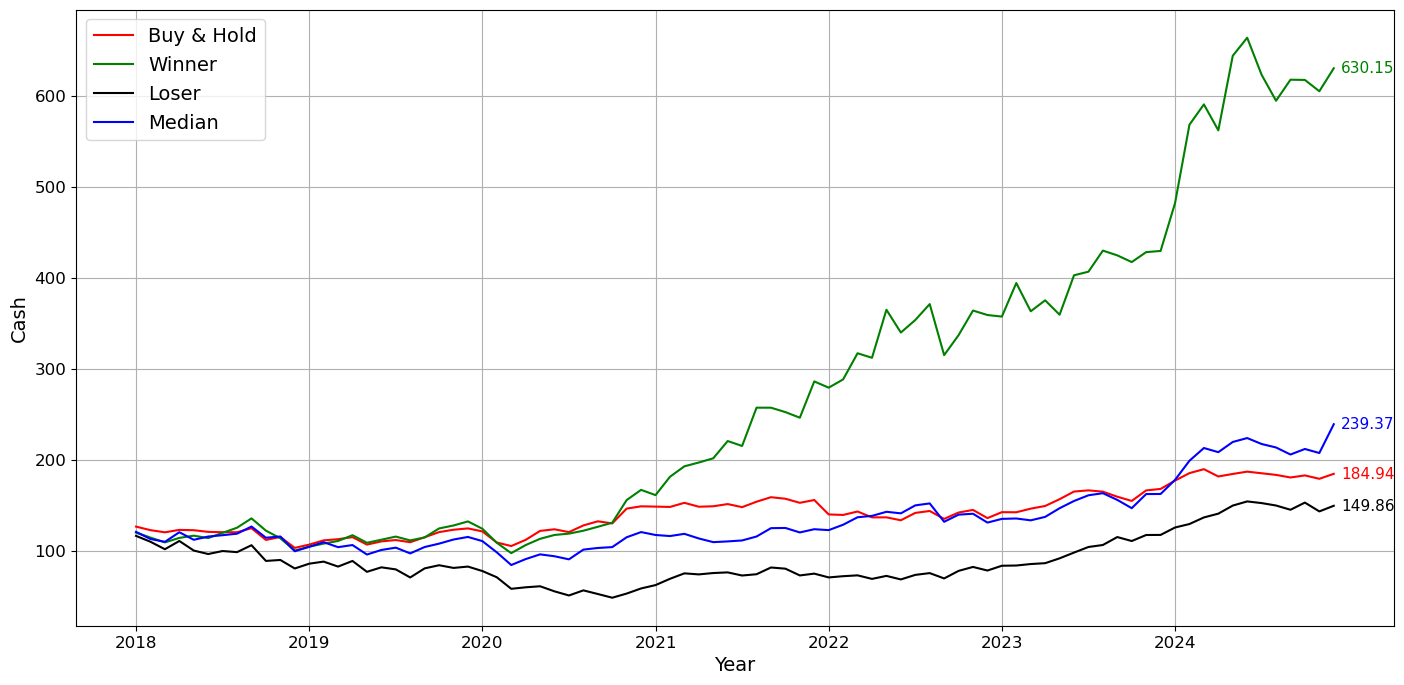

In [47]:
plt.figure(figsize = (17,8))

merged_df_vals['Year_Month'] = merged_df_vals['Year'].astype(str) + '-' + merged_df_vals['Month'].astype(str)
col_plot = ['Buy_and_Hold', 'Winners_Buy_and_Hold', 'Losers_Buy_and_Hold', 'Median_Buy_and_Hold']
colors = ['red', 'green', 'black', 'blue']
labels = ["Buy & Hold", "Winner", "Loser", "Median"]

for col, color, label in zip(col_plot, colors, labels):
    plt.plot(merged_df_vals['Year_Month'], merged_df_vals[col], label = label, color = color, linestyle = "-")

    final_value = merged_df_vals[col].iloc[-1]
    final_x = merged_df_vals.index[-1]
    
    plt.text(final_x + 0.5, final_value, str(round(final_value,2)),
             fontsize = 11, color = color, 
             ha='left', va='center')

unique_years = merged_df_vals['Year'].astype(str).unique()  
plt.xticks([merged_df_vals[merged_df_vals['Year'] == int(year)].index[0] for year in unique_years], 
           unique_years,
          fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Cash", fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.savefig('strategies over time.png', dpi = 300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x600 with 0 Axes>

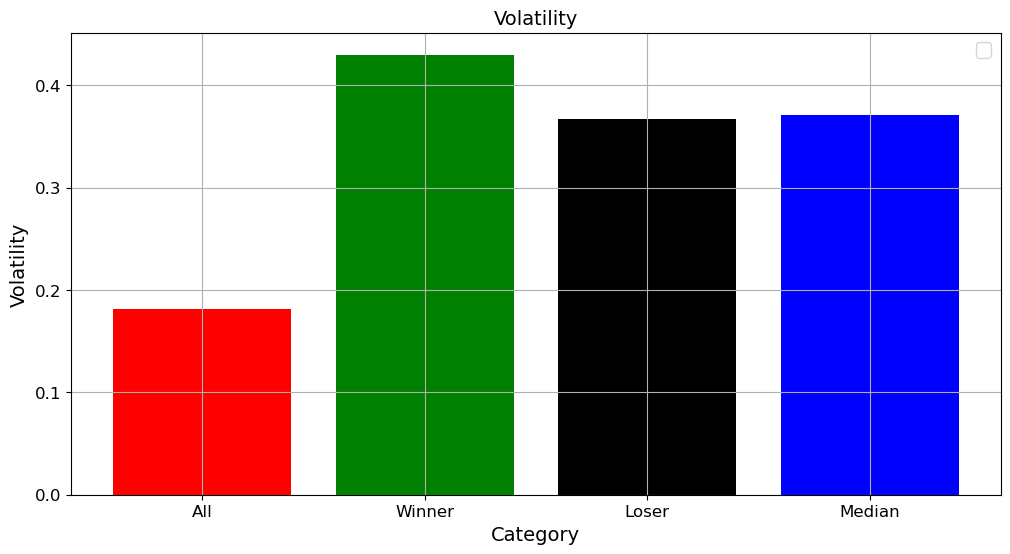

In [48]:
plt.figure(figsize = (12,6))
col_plot = merged_volatility.columns[1:].tolist()

avg_volatility = merged_volatility[col_plot].mean()
colors = ['red', 'green', 'black', 'blue']

plt.figure(figsize=(12, 6))
plt.bar(avg_volatility.index, avg_volatility.values,
        color=colors)

plt.xlabel("Category", fontsize=14)
plt.ylabel("Volatility", fontsize=14)
plt.title("Volatility", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid()
plt.savefig('Volatility_Plot_alone.png', dpi = 300, bbox_inches='tight')

In [49]:
averages_vol = merged_volatility.iloc[:, 1:].mean()

averages_vol.to_csv("averages_calculated_volatility_six_month.csv", header=["Average"], index_label="Category")

In [50]:
averages_sharpe = merged_sharpe.iloc[:, 1:].mean()

averages_sharpe.to_csv("averages_calculated_sharpe_six_month.csv", header=["Average"], index_label="Category")

In [51]:
averages_drawdowns = merged_drawdowns.iloc[:, 1:].mean()

averages_drawdowns.to_csv("averages_calculated_drawdown_six_month.csv", header=["Average"], index_label="Category")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x600 with 0 Axes>

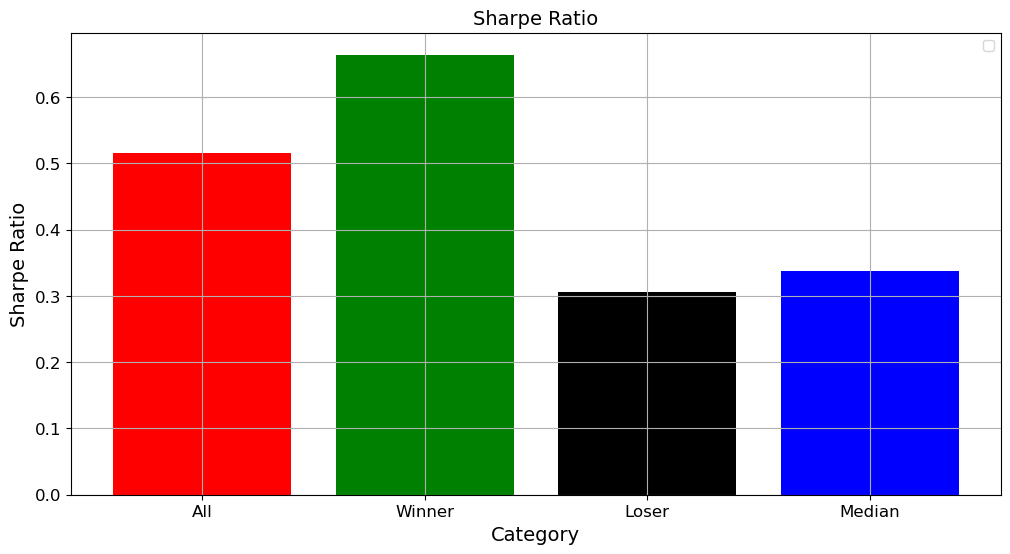

In [52]:
plt.figure(figsize = (12,6))
col_plot = merged_sharpe.columns[1:].tolist()

avg_sharpe = merged_sharpe[col_plot].mean()
colors = ['red', 'green', 'black', 'blue']

plt.figure(figsize=(12, 6))
plt.bar(avg_sharpe.index, avg_sharpe.values,
        color=colors)

plt.xlabel("Category", fontsize=14)
plt.ylabel("Sharpe Ratio", fontsize=14)
plt.title("Sharpe Ratio", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.legend()
plt.grid()
plt.savefig('Sharpe_Plot_alone.png', dpi = 300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x600 with 0 Axes>

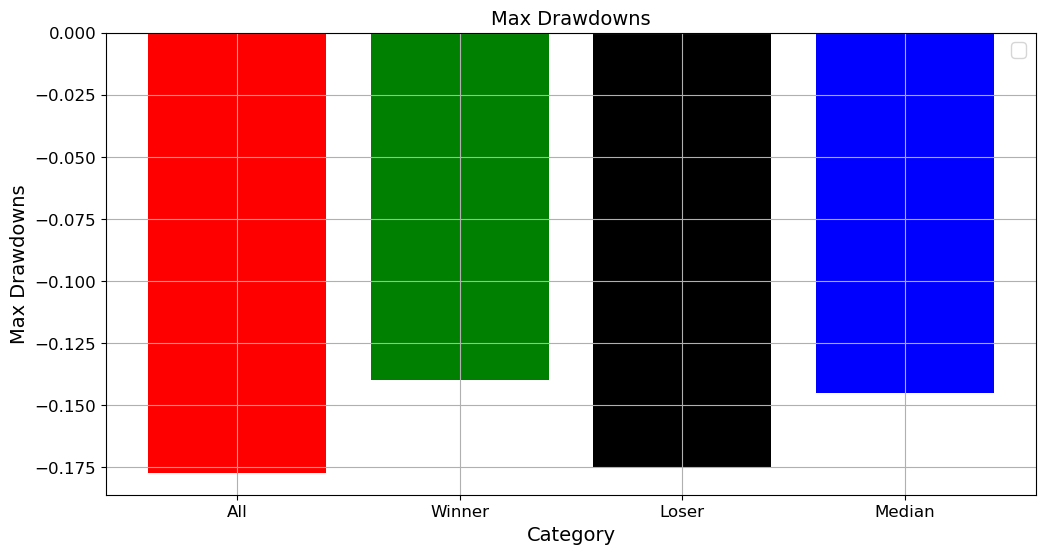

In [53]:
plt.figure(figsize = (12,6))
col_plot = merged_drawdowns.columns[1:].tolist()

avg_drawdowns = merged_drawdowns[col_plot].mean()
colors = ['red', 'green', 'black', 'blue']

plt.figure(figsize=(12, 6))
plt.bar(avg_drawdowns.index, avg_drawdowns.values,
        color = colors)

plt.xlabel("Category", fontsize=14)
plt.ylabel("Max Drawdowns", fontsize=14)
plt.title("Max Drawdowns", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid()
plt.savefig('Max_Drawdowns_alone.png', dpi = 300, bbox_inches='tight')

#saving drawdowns into a csv
avg_drawdowns_df = avg_drawdowns.reset_index()
avg_drawdowns_df.columns = ['Category', 'Max_Drawdowns']
avg_drawdowns_df.to_csv('japan_average_drawdowns_six_month.csv')

In [54]:
avg_drawdowns

All      -0.17715615762098235741
Winner   -0.13991469999444849925
Loser    -0.17474559394105296239
Median   -0.14490909701786350294
dtype: float64

                                  All                  Winner  \
Volatility     0.18119265827771666166  0.42987706106781387039   
Sharpe Ratio   0.51502915627365530860  0.66410938227608062867   
Max Drawdowns -0.17715615762098235741 -0.13991469999444849925   

                                Loser                  Median  
Volatility     0.36737204174901744169  0.37143164540342432645  
Sharpe Ratio   0.30663396178228058409  0.33752106670576248471  
Max Drawdowns -0.17474559394105296239 -0.14490909701786350294  


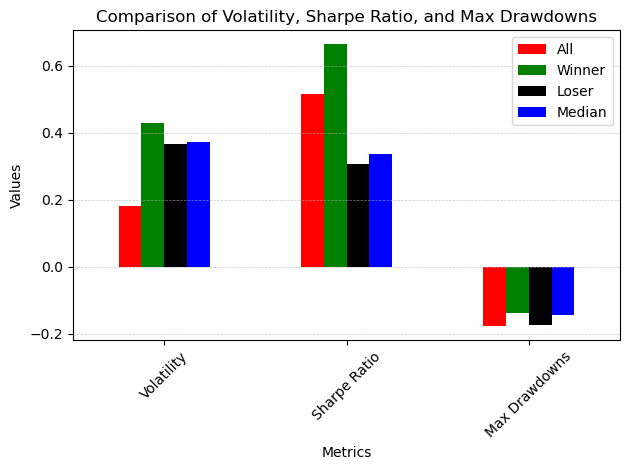

In [55]:
categories = ['All', 'Winner', 'Loser', 'Median']

avg_volatility = merged_volatility[categories]
avg_sharpe = merged_sharpe[categories]
avg_drawdown = merged_drawdowns[categories]

# Combine all metrics into one df
metrics_data = {
    'Volatility': avg_volatility.mean(),
    'Sharpe Ratio': avg_sharpe.mean(),
    'Max Drawdowns': avg_drawdown.mean()
}

colors = ['red', 'green', 'black', 'blue']

# transpose
metrics_df = pd.DataFrame(metrics_data).T
print(metrics_df)

metrics_df.plot(kind = 'bar', color = colors)

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Volatility, Sharpe Ratio, and Max Drawdowns')
plt.xticks(rotation = 45)
plt.legend()

plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, axis='y')


plt.savefig('Comparison_of_Volatility_Sharpe_Ratio_and_Max_Drawdowns.png', dpi=300, bbox_inches='tight')
plt.show()


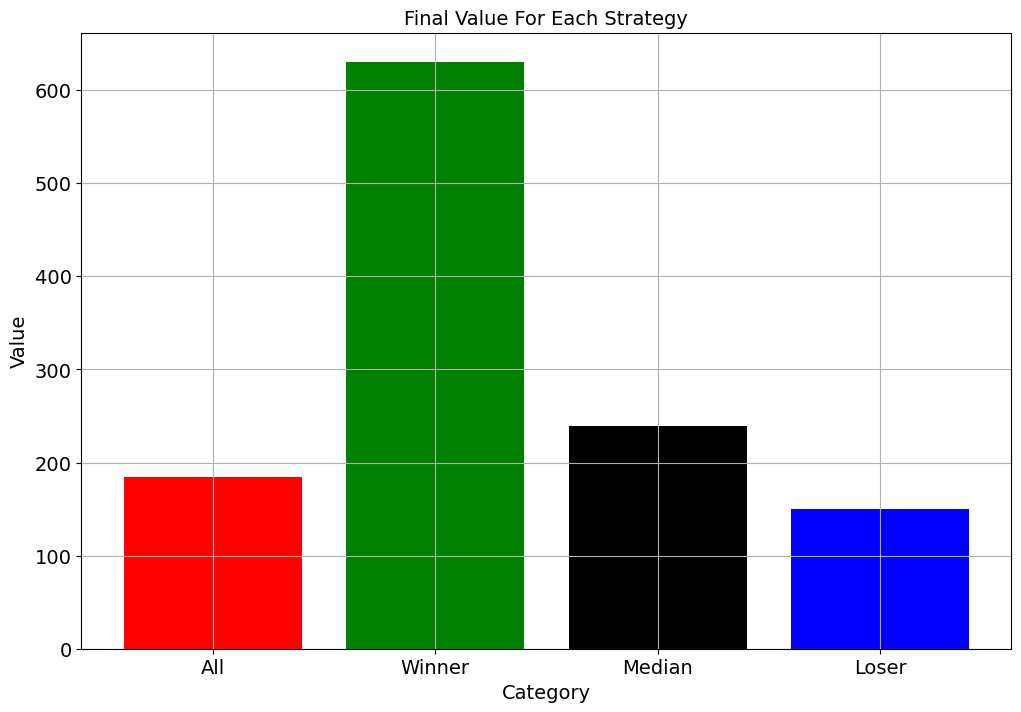

In [56]:
col_rename = ['Year', 'Month', 'All', 'Winner', 'Loser', 'Median', 'Year_Month']
merged_df_vals.columns = col_rename
cols = ['All', 'Winner', 'Median', 'Loser']
merged_df_vals_filtered = merged_df_vals[cols]
final_val = merged_df_vals_filtered.iloc[-1]
final_val.to_csv('japan_six_month_fin.csv')
colors = ['red', 'green', 'black', 'blue']

plt.figure(figsize=(12, 8))
plt.bar(final_val.index, final_val.values, color = colors)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Final Value For Each Strategy", fontsize=14)
plt.grid()

plt.savefig('Final Value For Each Strategy.png', dpi = 400, bbox_inches='tight')

In [57]:
def create_table(final_df):
    
    grouped_data = final_df.groupby('Year').agg({
        'All': 'last',
        'Winner': 'last',
        'Median': 'last',
        'Loser': 'last',
    }).reset_index()

    return grouped_data


In [58]:
tablee = create_table(merged_df_vals)

In [59]:
tablee

,Year,All,Winner,Median,Loser
0,2018,103.62860771546561977630,100.64305000583631510835,99.94465371096340788881,81.01302205669557565670
1,2019,125.00553827118540084484,132.68769711159828261771,115.64765330727166769975,83.11349236820393571179
2,2020,149.26639516524051032320,167.30651972156888973586,120.98972301051419719897,59.11311253761027728615
3,2021,156.18476938475626525360,286.36314443718509892278,124.13768716978165684850,75.37829494430863519483
4,2022,136.32481895235036972736,359.26456618507359053183,131.39183281093215782676,78.76087394825285059596
5,2023,168.35849766767378810073,429.59554999577284206680,162.79483034916864880870,117.87007572488035123115
6,2024,184.93864634322412143774,630.14865257506926354836,239.37067339077094629829,149.86158716459044626390


In [60]:
tablee.to_csv('Final Buy and Hold_six_month.csv')

In [61]:
merged_df_metrics

,Year,Volatility,Annualized_Returns,Sharpe_Ratio,Max_Drawdowns,Winner_Volatility,Loser_Volatility,Median_Volatility,Winner_Annualized_Returns,Loser_Annualized_Returns,Median_Annualized_Returns,Winner_Sharpe_Ratio,Loser_Sharpe_Ratio,Median_Sharpe_Ratio,Winner_Max_Drawdowns,Loser_Max_Drawdowns,Median_Max_Drawdowns
0,2018,0.18725323949211922225,-0.18642588465786044671,-0.99558162605622857466,-0.24864684714122411990,0.36618494505987875254,0.34364028078468222827,0.37090017198691865863,-0.19034590600931891591,-0.32520524091100777575,-0.16863368685363616661,-0.51980811493545553414,-0.94635367008902704367,-0.45466057874889242996,-0.26009222040659629727,-0.30889603037476293101,-0.21360185623742405925
1,2019,0.13439664380095367457,0.23663811376001772646,1.76074422000066754812,-0.09435669797133762471,0.27058213954529958256,0.37393039680402800906,0.30555649637105203320,0.34524222471858828643,0.05256020803941964525,0.18991443697305643301,1.27592392202512483479,0.14056147477886307695,0.62153624363605131098,-0.07071889488474322749,-0.20321323636736782214,-0.12335356507478703603
2,2020,0.21425387770208453864,0.20932358328114417101,0.97698854053976169620,-0.27845930941738106235,0.39118132787211262746,0.47475751354376288793,0.45953663316153547935,0.29359684061337965044,-0.28562337613048149887,0.04336583085534152088,0.75053899481972230490,-0.60161949623184407532,0.09436860464636263879,-0.26237546631478136927,-0.41134764504407272945,-0.26674499084800262771
3,2021,0.16579248322957734763,0.05086893272082134571,0.30682291337890005289,-0.10668150049553097591,0.50993410260401617062,0.33128594109100051313,0.31764776587438459110,0.72061593709710403122,0.28033113675458964931,0.02749919082229529063,1.41315502026090333842,0.84619086409581700803,0.08657133396357645505,-0.04277040268592329636,-0.10624314709564157411,-0.09132564268241737115
4,2022,0.20008679582421146081,-0.14104791069502992107,-0.70493362699930073312,-0.19028638547456463992,0.52703026242718997718,0.34977502766853979521,0.38693749299828139598,0.22287797923718438708,0.02670996376868126423,0.03395300681148834959,0.42289408242088433187,0.07636326683102330481,0.08774804051268082772,-0.15096372842222882671,-0.08466713853235419140,-0.13814602124016606144
5,2023,0.14229545289154951759,0.25610854557596196557,1.79983646962461341090,-0.09498179102649374761,0.37975062457518526937,0.26090140614922741058,0.33977891652243230602,0.21045637351766208201,0.52667874700170913549,0.29335825036139029365,0.55419625379969505996,2.01868880193181254867,0.86337979225977867781,-0.08824108853631904004,-0.03790493669797854320,-0.10059319658040233314
6,2024,0.22427011500352106443,0.10346190496686502591,0.46132720342717381534,-0.22668057182034440089,0.56447602539101471297,0.43731372620188113665,0.41966404090936565430,0.42441005897049155493,0.26790122734434151930,0.44639833184287935897,0.75186551754169028694,0.61260649115931897768,1.06370403067077989867,-0.10424109871054738907,-0.07094702347519299401,-0.08059840646184507351


In [62]:
merged_df_metrics.to_csv('Final Metrics_six_month.csv')